# Aplicando o Método JT pelo R

## **Importação do documento**
Para calcular o Índice de Mudança Confiável e de Significância Clínica no R, é necessário primeiro importar o documento para manipulação no programa. Serão utilizados os dados coletados antes e após o Treinamento de Habilidades Sociais da pesquisa realizada por Siqueira et al. (2021). Neste exemplo uma planilha em formato .xlsx será usada, mas isso poderia igualmente ser realizado com um arquivo .csv ou outros formatos. Para este propósito será empregado o pacote readxl. Para instalá-lo basta executar a linha de código:


In [ ]:
install.packages("readxl")

Tendo este pacote sido instalado, a importação do documento pode ser feita da seguinte forma (tendo em mente a necessidade de colocar endereço completo da localização da planilha entre as aspas):

In [1]:
data <- readxl::read_excel("dados.xlsx")

Utilizando o comando *head()*, podemos verificar as seis primeiras entradas do programa. A disposição e conteúdo refletem a do documento importado:


In [2]:
head(data)

sujeitos,Idade,Gênero,CoopAfetProT1,CoopAfetProT2,PCExtProT1,PCExtProT2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,2,1.6666667,2.000000,0.6666667,0.3333333
2,10,2,0.0000000,1.000000,0.5000000,1.0000000
3,10,1,0.3333333,1.333333,1.8333333,1.3333333
4,10,2,1.6666667,1.333333,0.3333333,1.0000000
5,10,1,2.0000000,1.000000,0.6666667,1.1666667
6,13,2,0.6666667,1.666667,0.5000000,0.5000000


## **Definição de constantes**
Uma vez que o status do documento foi verificado, antes de dar prosseguimento cabe que sejam definidas as constantes utilizadas no programa. É prejudicial para a compreensão e legibilidade do código não transformar quaisquer números ou valores importantes em variáveis, e portanto os valores extremos do índice de mudança confiável (1,96 e -1,96) e o Alfa de Cronbach da amostra, previamente calculado, são a seguir definidos:

In [3]:
CONF <- 1.96 # valor de corte do índice de mudança confiável
ALPHA_coop <- 0.78 # alfa referente à variável 
# Cooperação/Afetividade (coop) avaliada pelos professores

## **Cálculo do ponto de corte** 
Tendo isto sendo feito, o cálculo do ponto de corte da significância clínica pode ser feito de forma breve. Faremos o cálculo referente apenas à variável Cooperação/Afetividade (coop). Utilizamos a função *mean()* para calcular a média e a função *sd()* para calcular o desvio-padrão:

In [5]:
coop <- data[4:5] # pois a quarta e a quinta coluna referem aos escores pré- e pós-teste desta variável
coop.pre <- coop[[1]] # os escores pré-teste da variável cooperação estão na primeira coluna do elemento "coop".

# média; a função “mean()” é utilizada para calcular a média
m.coop <- mean(coop.pre)

# desvio-padrão; a função para cálculo do desvio padrão é “sd()”
sd.coop <- sd(coop.pre)

# ponto de corte
corte.coop <- m.coop + (2*sd.coop)

## **Cálculo do Índice de Mudança Confiável** 
Para calcular o IMC, é necessário utilizar os escores pós-teste das variáveis.  Como as variáveis com escores pré- e pós-teste de ambas as variáveis foram feitos anteriormente, isso pode ser feito da seguinte forma:

In [6]:
# Em ambas as variáveis, a segunda coluna representa os escores pós-teste.
coop.pos <- coop[[2]]

É necessário calcular primeiro o Erro Padrão de Medida:

In [7]:
# para a variável coop
ep_medida.coop <- sd.coop * sqrt(1-ALPHA_coop)

E então o Erro Padrão da Diferença:

In [8]:
ep_diferenca.coop <- sqrt(2*(ep_medida.coop**2))

O IMC é calculado a seguir. Como os valores das variáveis coop.pre e coop.pos se referem aos escores puros, elas são posteriormente reorganizadas em uma tabela com a função *data.frame()*:

In [9]:
IMC_coop <- (coop.pos - coop.pre) / ep_diferenca.coop
imc.coop.df <- data.frame(IMC_coop)

## Organizando variáveis
 Os valores agora obtidos podem ser transformados e adicionados como uma nova coluna às variável coop e pc.ext:

In [10]:
# como a variável coop possui duas colunas, a primeira referente aos escores pré-teste 
# e a segunda, aos escores pós-teste, uma terceira coluna, contendo os valores atribuídos 
# à variável imc.coop.df pode ser criada da seguinte forma: 
coop[3] <- imc.coop.df
# então se renomeia esta coluna utilizando a variável name() por motivos de auxiliar a compreensão:
names(coop)[3] <- "IMC"

Podemos então obter a interpretação dos resultados observando os valores da coluna IMC. Se os valores forem superiores a 1,96, então há mudança positiva confiável. Se os valores forem inferiores a -1,96, há mudança negativa confiável. Em caso de valores superiores a -1,96, mas inferiores a 1,96, então há uma ausência de mudança confiável. Podemos, entretanto, delegar essa interpretação ao próprio R criando uma nova função e aplicando-a aos valores da coluna 3 com a função apply():

In [11]:
# MDC = mudança positiva confiável
# MNC = mudança negativa confiável
# ADM = ausência de mudança
mudança <- function(value) {
        if (value > 1.96) { return("MPC") }
        else if (value < -1.96) { return("MNC") } 
        else if ((value > -1.96) & (value < 1.96)) {return("ADM") }
      }
# interpretação para a variável coop
coop[4] <- apply(coop[3], 1, mudança)
names(coop)[4] <- "Interpretação"

E então utilizamos head() para verificar parte dos resultados: 

In [12]:
head(coop)

CoopAfetProT1,CoopAfetProT2,IMC,Interpretação
<dbl>,<dbl>,<dbl>,<chr>
1.6666667,2.000000,1.062333,ADM
0.0000000,1.000000,3.186998,MPC
0.3333333,1.333333,3.186998,MPC
1.6666667,1.333333,-1.062333,ADM
2.0000000,1.000000,-3.186998,MNC
0.6666667,1.666667,3.186998,MPC


Podemos reduzir as casas decimais utilizando da coluna IMC a função *round()*. Esta função recebe dois parâmetros: o primeiro é o número (ou grupo de números) a ser arredondado, e o segundo é o número de casas decimais a manter. Para o primeiro parâmetro utilizamos *coop[3]* pois o escore do IMC que estamos arredondando se encontra na terceira coluna da variável coop. Serão mantidas duas casas decimais:

In [13]:
coop[3] <- round(coop[3], 2)

Podemos, por outro lado, fazer isso com as três primerias colunas da seguinte forma:

In [14]:
coop[1:3] <- round(coop[1:3], 2)

In [15]:
head(coop)

CoopAfetProT1,CoopAfetProT2,IMC,Interpretação
<dbl>,<dbl>,<dbl>,<chr>
1.67,2.00,1.06,ADM
0.00,1.00,3.19,MPC
0.33,1.33,3.19,MPC
1.67,1.33,-1.06,ADM
2.00,1.00,-3.19,MNC
0.67,1.67,3.19,MPC


## **Construção de gráficos**
 Isso é o bastante para o cálculo e interpretação da mudança provocada por uma intervenção pelo método JT. Caso se queira, entretanto, produzir gráficos para promover uma interpretação visual dos resultados, isso pode ser feito utilizando a função *plot()*.

Nesta função, o parâmetro *x* corresponde ao eixo-x, e o parâmetro *y*, ao eixo-y. Os parâmetros *xlim* e *ylim* representam, respectivamente, os valores mínimo e máximo da linha do eixo-x e da linha do eixo-y. Os valores aqui adotados adotados foram escolhidos por conveniência, para facilitar a interpretação do gráfico.

Os parâmetros *xlab* e *ylab* correspondem, respectivamente, às legendas do eixo-x e do eixo-y. 

Por padrão, o R representa os resultados como círculos pretos ocos no gráfico, mas como nesta amostra há múltiplos indivíduos que se sobrepõem no gráfico, decidimos representá-los por círculos e triângulos de cores azul e vermelho parcialmente translúcidos, para que seja possível identificar a sobreposição de indivíduos pela cor e pela forma. Isso é representado pelos parâmetros *pch* e *col*, que correspondem, respectivamente, às formas utilizadas e às cores utilizadas. As cores utilizadas estão em formato de hexadecimal, vermelho e azul, com 50% de opacidade. Os valores 1 e 2, na variável pch, correspondem ao círculo e ao triângulo. 

O comando *plot()* deve ser seguido do comando *abline()* para desenhar linhas. Esta função será utilizada para exibir as linhas da bissetriz, as linhas que assinalam os intervalos de mudança confiável e a que representa a significância clínica.

O primeiro parâmetro da função *abline()* corresponde ao coeficiente linear, e o segundo, ao coeficiente angular da reta. Assim, a exibição do gráfico dos resultados para a variável Cooperação/Expressividade pode ser feita da seguinte forma:


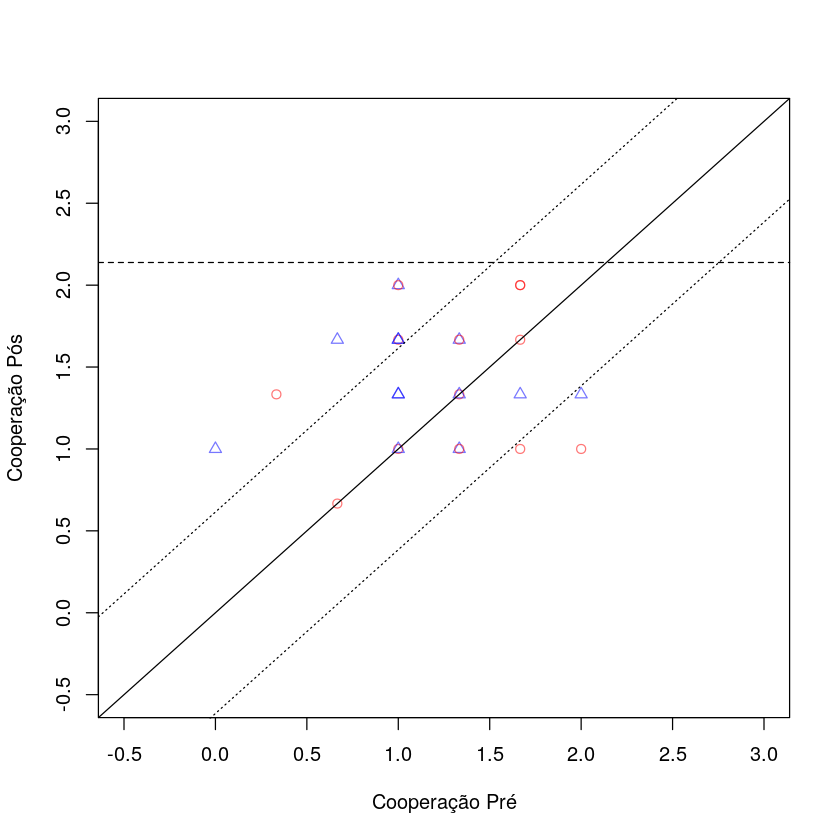

In [17]:
# o eixo-x representa os escores pré-teste e o eixo-y representa os escores pós-teste.
plot(x=coop.pre, y=coop.pos,
     xlim=c(-0.5,3), ylim=c(-0.5,3), pch=c(1,2), col=c("#ff000088","#0000ff88"),
     xlab="Cooperação Pré", ylab="Cooperação Pós")
# com 0 de coeficiente linear e 1 de coeficiente angular, 
# garantimos que x=y para cada ponto atravessado pela bissetriz, 
# de modo que ficarão exatamente sobre a bissetriz apenas os indivíduos que não exibiram nenhuma mudança. 


abline(0,1)
# O parâmetro lty representa a linha. lty=2 corresponde a linhas tracejadas, e lty=3, a linhas pontilhadas


# utilizamos a variável corte.coop para representar a linha de corte da significância clínica. 
# O parâmetro h indica que a linha deve ser desenhada na horizontal.

abline(h=corte.coop, lty=2)
# utilizamos a variável limite_coop para representar o limite superior do IMC. 
# É utilizada a constante CONF que definimos anteriormente.
limite_coop <- CONF*ep_diferenca.coop

abline(limite_coop,1, lty=3)
# para representar o limite inferior do IMC, utilizamos o negativo da variável limite_coop.
abline(-limite_coop,1,lty=3)